# Classical ML Training and Results V1 
* Simply dump all the data we have into a matrix 
* Did not extract specific features 
* Did not balance samples 
* Might be over-fitting 

## INITIALIZATION

In [64]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 

#import statements from neural example 
# from __future__ import print_function
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Embedding
# from keras.layers import Conv1D, GlobalMaxPooling1D
# from keras.datasets import imdb

## DATA LABELING

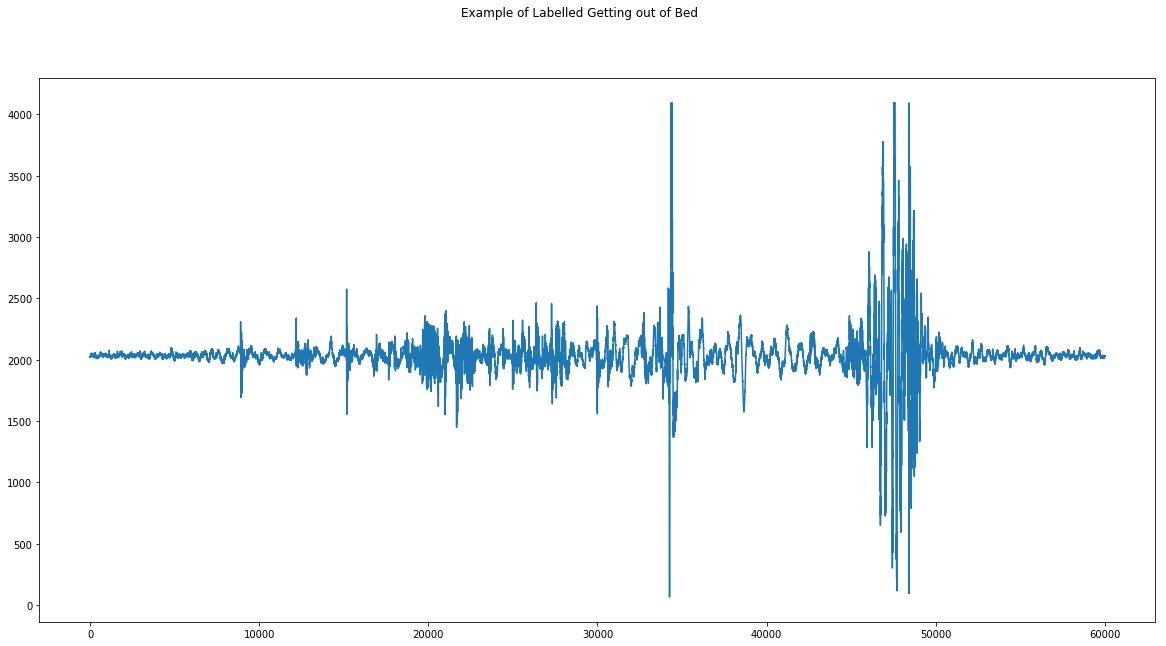

In [40]:
f = open("data/getOutBed.csv")
data = []
for row in f:
    data = [int(p) for p in row.split(',')]
    break 

plt.figure(figsize = (20,10))
plt.suptitle('Example of Labelled Getting out of Bed')
plt.plot(data)
f.close()

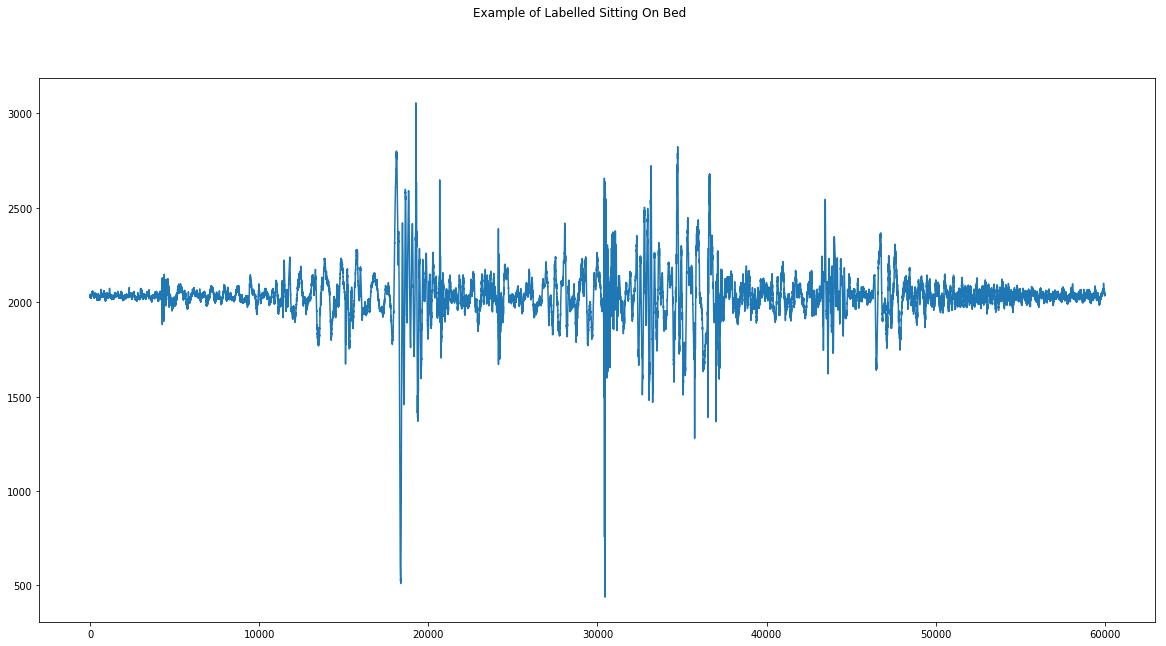

In [41]:
f = open("data/sitOnBed.csv")
data = []
for row in f:
    data = [int(p) for p in row.split(',')]
    break 

plt.figure(figsize = (20,10))
plt.suptitle('Example of Labelled Sitting On Bed')
plt.plot(data)

## MODEL INITIALIZATION

In [47]:
# read data from csv file and put into one matrix 
def readData(filename,x1):
    f = open("data/"+filename,'r')
    for row in f:
        data = [int(p) for p in row.split(',')]
        x1.append(np.array(data))
    return 

x = []
readData("getOutBed.csv",x)
readData("getOnBed.csv",x)
readData("layOnBed.csv",x)
readData("sitOnBed.csv",x)

<type 'list'>


In [52]:
# make X an numpy array and initialize Y 
x = np.array(x)
y = np.array([1]*120+[0]*360)

<type 'numpy.ndarray'>


In [53]:
# shuffle X and Y correspondingly 
X, Y = shuffle(x, y, random_state = 34)
offset = int(len(X)*0.8)
X_train, Y_train = X[:offset], Y[:offset]
X_test, Y_test = X[offset:], Y[offset:]
print (type(X_train), type(Y_train))
print (len(X_train), len(X_train[0]), len(Y_train), len(X_test), len(X_test[0]), len(Y_test))

<type 'numpy.ndarray'> <type 'numpy.ndarray'>
384 60000 384 96 60000 96


## SVM MODEL

In [54]:
# training of SVM 
clf = svm.SVC(gamma='scale',max_iter=5000, verbose=True)
clf.fit(X_train, Y_train)  

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [57]:
# Verification of SVM 
results = clf.predict(X_test)
correct = 0
for i in xrange(len(results)):
    if results[i] == Y_test[i]:
        correct+=1
print (correct/float(len(Y_test)))

0.71875


## GAUSSIAN NAIVE BAYES

In [58]:
# training 
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
results_nb = clf_nb.predict(X_test)

In [60]:
# verification
c_nb = 0 
for i in xrange(len(results_nb)):
    if results_nb[i] == Y_test[i]:
        c_nb += 1
print (c_nb/float(len(Y_test)))

0.822916666667


## GRADIENT BOOSTING CLASSIFIER

In [61]:
clf_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0, verbose = True).fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9804            1.01m
         2           0.8612           59.81s
         3           0.7857           59.61s
         4           0.7040           59.70s
         5           0.6261           58.98s
         6           0.5528           58.31s
         7           0.5078           57.49s
         8           0.4665           56.94s
         9           0.4307           56.36s
        10           0.4038           55.91s
        20           0.1817           49.86s
        30           0.0923           43.69s
        40           0.0594           37.43s
        50           0.0367           31.21s
        60           0.0238           24.96s
        70           0.0144           18.70s
        80           0.0079           12.46s
        90           0.0054            6.23s
       100           0.0039            0.00s


In [21]:
# verification
clf_gbc.score(X_test,Y_test)

0.75